In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:

review_data = pd.read_csv('reviews6.csv')

In [ ]:
review_data.shape

(40432, 4)

In [ ]:
review_data.isnull().sum()

category    0
rating      0
label       0
text        0
dtype: int64

# New Section

In [ ]:
review_data['content'] = review_data['category']+':'+review_data['text']

In [ ]:
review_data.head()

,category,rating,label,text,content
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...","Home_and_Kitchen_5:Love this! Well made, stur..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...","Home_and_Kitchen_5:love it, a great upgrade fr..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,Home_and_Kitchen_5:This pillow saved my back. ...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",Home_and_Kitchen_5:Missing information on how ...
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,Home_and_Kitchen_5:Very nice set. Good quality...


In [ ]:
X = review_data.drop(columns='label', axis =1)
Y = review_data['label']

In [ ]:
print(X)

                           category  rating  \
0                Home_and_Kitchen_5       5   
1                Home_and_Kitchen_5       5   
2                Home_and_Kitchen_5       5   
3                Home_and_Kitchen_5       1   
4                Home_and_Kitchen_5       5   
...                             ...     ...   
40427  Clothing_Shoes_and_Jewelry_5       4   
40428  Clothing_Shoes_and_Jewelry_5       5   
40429  Clothing_Shoes_and_Jewelry_5       2   
40430  Clothing_Shoes_and_Jewelry_5       1   
40431  Clothing_Shoes_and_Jewelry_5       5   

                                                    text  \
0      Love this!  Well made, sturdy, and very comfor...   
1      love it, a great upgrade from the original.  I...   
2      This pillow saved my back. I love the look and...   
3      Missing information on how to use it, but it i...   
4      Very nice set. Good quality. We have had the s...   
...                                                  ...   
40427  I had re

In [ ]:
print(Y)

0        CG
1        CG
2        CG
3        CG
4        CG
         ..
40427    OR
40428    CG
40429    OR
40430    CG
40431    OR
Name: label, Length: 40432, dtype: object


In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:

review_data['content'] = review_data['content'].apply(stemming)

In [ ]:
print(review_data['content'])

0        home kitchen love well made sturdi comfort lov...
1        home kitchen love great upgrad origin mine cou...
2        home kitchen pillow save back love look feel p...
3         home kitchen miss inform use great product price
4         home kitchen nice set good qualiti set two month
                               ...                        
40427    cloth shoe jewelri read review say bra ran sma...
40428    cloth shoe jewelri sure exactli would littl la...
40429    cloth shoe jewelri wear hood wear hood wear ja...
40430    cloth shoe jewelri like noth dress reason gave...
40431    cloth shoe jewelri work wed industri work long...
Name: content, Length: 40432, dtype: object


In [ ]:
messages=X.copy()
messages['text'][1]
messages.reset_index(inplace=True)

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
35432
35433
35434
35435
35436
35437
35438
35439
35440
35441
35442
35443
35444
35445
35446
35447
35448
35449
35450
35451
35452
35453
35454
35455
35456
35457
35458
35459
35460
35461
35462
35463
35464
35465
35466
35467
35468
35469
35470
35471
35472
35473
35474
35475
35476
35477
35478
35479
35480
35481
35482
35483
35484
35485
35486
35487
35488
35489
35490
35491
35492
35493
35494
35495
35496
35497
35498
35499
35500
35501
35502
35503
35504
35505
35506
35507
35508
35509
35510
35511
35512
35513
35514
35515
35516
35517
35518
35519
35520
35521
35522
35523
35524
35525
35526
35527
35528
35529
35530
35531
35532
35533
35534
35535
35536
35537
35538
35539
35540
35541
35542
35543
35544
35545
35546
35547
35548
35549
35550
35551
35552
35553
35554
35555
35556
35557
35558
35559
35560
35561
35562
35563
35564
35565
35566
35567
35568
35569
35570
35571
35572
35573
35574
35575
35576
35577
35578
35579
35580
35581
35582
35583
35584
35585
35586
35587
35588
35589
3

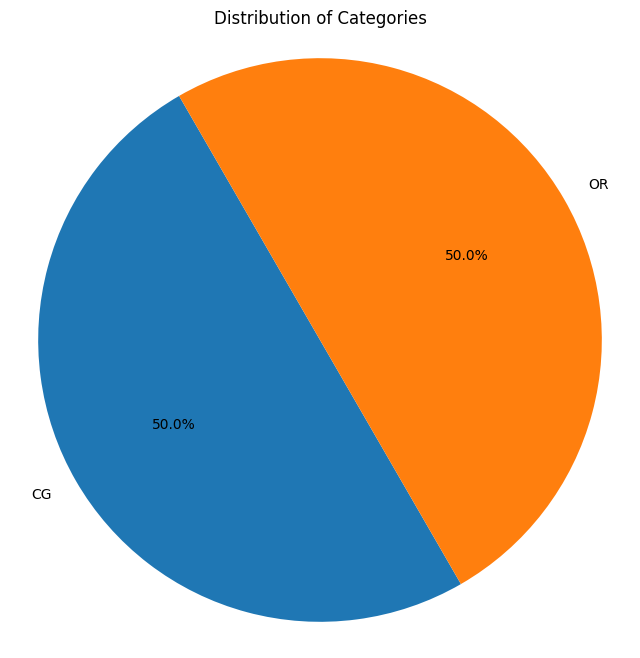

In [ ]:
import matplotlib.pyplot as plt
# Generating a pie chart for distribution of categories
category_counts = review_data['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=120)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

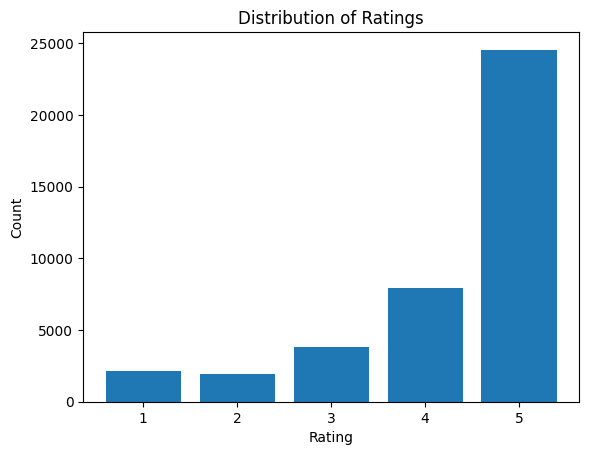

In [ ]:
import matplotlib.pyplot as plt
# Generating a bar graph for distribution of ratings
rating_counts = review_data['rating'].value_counts()
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(review_data['content'])

# Convert text to sequences
X_seq = tokenizer.texts_to_sequences(review_data['content'])


In [ ]:
# Pad sequences to ensure uniform length
maxlen = 100
X_pad = pad_sequences(X_seq, maxlen=maxlen)

# Convert labels to one-hot encoded format
def vectorize_reviews(reviews):
    # Assuming 'corpus' is a list of preprocessed reviews
    vocabulary = set([word for review in corpus for word in review])  # Efficiently get unique words
    voc_size = len(vocabulary)
    onehot_encoded = np.zeros((len(reviews), voc_size), dtype=np.int8)
    for i, review in enumerate(reviews):
        for j, word in enumerate(review):
             if word in vocabulary:
                 onehot_encoded[i, vocabulary.index(word)] = 1
    return onehot_encoded

In [ ]:
num_classes = len(pd.unique(review_data['label']))
Y_one_hot = pd.get_dummies(review_data['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, Y_one_hot, test_size=0.2, random_state=42)


In [ ]:
 #Define the LSTM model
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 10

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", accuracy)

Epoch 1/10
506/506 - 198s - loss: 0.3543 - accuracy: 0.8390 - val_loss: 0.3047 - val_accuracy: 0.8703 - 198s/epoch - 391ms/step
Epoch 2/10
506/506 - 192s - loss: 0.2237 - accuracy: 0.9069 - val_loss: 0.2523 - val_accuracy: 0.8966 - 192s/epoch - 379ms/step
Epoch 3/10
506/506 - 192s - loss: 0.1759 - accuracy: 0.9274 - val_loss: 0.2598 - val_accuracy: 0.8972 - 192s/epoch - 378ms/step
Epoch 4/10
506/506 - 190s - loss: 0.1422 - accuracy: 0.9426 - val_loss: 0.2583 - val_accuracy: 0.9017 - 190s/epoch - 376ms/step
Epoch 5/10
506/506 - 190s - loss: 0.1175 - accuracy: 0.9525 - val_loss: 0.2910 - val_accuracy: 0.8984 - 190s/epoch - 376ms/step
Epoch 6/10
506/506 - 190s - loss: 0.1044 - accuracy: 0.9599 - val_loss: 0.2995 - val_accuracy: 0.9005 - 190s/epoch - 376ms/step
Epoch 7/10
506/506 - 190s - loss: 0.0917 - accuracy: 0.9648 - val_loss: 0.3167 - val_accuracy: 0.8990 - 190s/epoch - 375ms/step
Epoch 8/10
506/506 - 188s - loss: 0.0803 - accuracy: 0.9688 - val_loss: 0.2896 - val_accuracy: 0.8946 - 

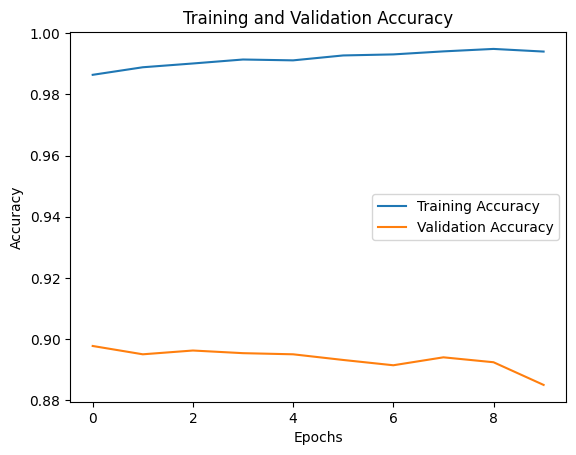

In [ ]:

import matplotlib.pyplot as plt

# Plotting training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

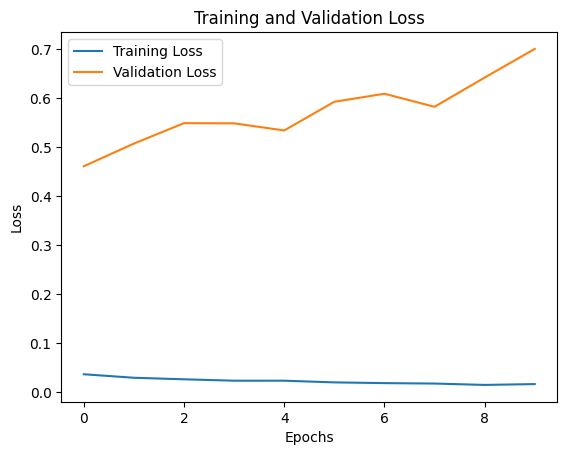

In [ ]:

import matplotlib.pyplot as plt

# Plotting training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd # Assuming you've already processed data using Pandas earlier

# ... (Your existing machine learning code) ...

def predict_authenticity(model, tokenizer, new_review, maxlen=100):
    """Preprocesses a new review and predicts its authenticity using the trained model"""

    # Apply the same stemming function used during training
    new_review = stemming(new_review)

    # Tokenize the new review
    new_review_seq = tokenizer.texts_to_sequences([new_review])

    # Pad the sequence (ensure this uses the same 'maxlen' as during training)
    new_review_pad = pad_sequences(new_review_seq, maxlen=maxlen)

    # Make a prediction
    prediction = model.predict(new_review_pad)

    # Get the class with the highest probability
    predicted_class_index = np.argmax(prediction[0])

    # Assuming your trained model has the same class ordering:
    labels = ['fake', 'genuine']  # Adjust if your labels were different
    predicted_label = labels[predicted_class_index]

    return predicted_label


# Get a new review as input from the user
my_review = input("Enter your review: ")

# Predict the authenticity of your review
prediction = predict_authenticity(model, tokenizer, my_review)
print("Prediction: This review is likely", prediction)


Enter your review: nice really sends the air out of the room.Very good quality.Nice, sturdy, and functional.  Great f1 the price. 
1/1 [==============================] - 0s 277ms/step
Prediction: This review is likely fake


In [ ]:
import pickle
# Load the tokenizer
tokenizer = Tokenizer()
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)


In [ ]:
model.save('review2.keras')

In [ ]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import re
import pickle

# Assuming tokenizer is the object you want to save
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)
# Load the saved model
model = load_model('review2.keras')

# Define functions for preprocessing and prediction
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

def predict_authenticity(model, tokenizer, new_review, maxlen=100):
    new_review = stemming(new_review)
    new_review_seq = tokenizer.texts_to_sequences([new_review])
    new_review_pad = pad_sequences(new_review_seq, maxlen=maxlen)
    prediction = model.predict(new_review_pad)
    predicted_class_index = np.argmax(prediction[0])
    labels = ['0', '1']
    predicted_label = labels[predicted_class_index]
    return predicted_label


# Load the preprocessed dataset
review_data = pd.read_csv('reviews6.csv')

# Load the tokenizer
tokenizer = Tokenizer()
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Get a new review as input from the user
my_review = input("Enter your review: ")

# Predict the authenticity of the review
prediction = predict_authenticity(model, tokenizer, my_review)

print("Prediction: This review is likely", prediction)


Enter your review: nice really sends the air out of the room.Very good quality.Nice, sturdy, and functional.  Great f1 the price. 
1/1 [==============================] - 0s 279ms/step
Prediction: This review is likely 0


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

In [ ]:
import gradio as gr
import re
import pickle
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer

# Load the saved model
model = load_model('review2.keras')

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Define functions for preprocessing and prediction
def stemming(content):
    port_stem = PorterStemmer()
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

def predict_authenticity(new_review):
    new_review = stemming(new_review)
    new_review_seq = tokenizer.texts_to_sequences([new_review])
    new_review_pad = pad_sequences(new_review_seq, maxlen=100)
    prediction = model.predict(new_review_pad)
    predicted_class_index = np.argmax(prediction[0])
    labels = ['fake', 'true']
    predicted_label = labels[predicted_class_index]
    return "This review is likely " + predicted_label

iface = gr.Interface(fn=predict_authenticity, inputs="text", outputs="text")
iface.launch()


OSError: No file or directory found at review2.keras